# Clustering y clasificación

# Distancias

<img src="img/img_993.png" width=550/>

<img src="img/img_994.png" width=550/>

<img src="img/img_995.png" width=650/>

In [1]:
from scipy.spatial import distance_matrix
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("datasets/movies/movies.csv", sep=";")
data.head()

,user_id,star_wars,lord_of_the_rings,harry_potter
0,1,1.2,4.9,2.1
1,2,2.1,8.1,7.9
2,3,7.4,3.0,9.9
3,4,5.6,0.5,1.8
4,5,1.5,8.3,2.6


Del dataset nos quedamos con los valores que nos interesan, eliminamos el user_id.

### Muy importante

En este caso **NO HACE FALTA NORMALIZAR** porque todas las películas vienen clasificadas del 0 al 10.

In [3]:
movies = data.columns.values[1:]
movies  # Cabecera de las películas

array(['star_wars', 'lord_of_the_rings', 'harry_potter'], dtype=object)

In [4]:
dd1 = distance_matrix(data[movies], data[movies], p=1)
dd2 = distance_matrix(data[movies], data[movies], p=2)
dd10 = distance_matrix(data[movies], data[movies], p=10)

In [5]:
# Definamos una función para convertir la matriz de distancias a DataFrame y poder hacer comparaciones
def dm_to_df(dd, col_name):
    return pd.DataFrame(dd, index=col_name, columns=col_name)

In [6]:
dm_to_df(dd1, data["user_id"])

user_id,1,2,3,4,5,6,7,8,9,10
user_id,,,,,,,,,,
1,0.0,9.9,15.9,9.1,4.2,6.9,10.5,7.4,5.6,0.7
2,9.9,0.0,12.4,17.2,6.1,6.2,0.8,4.9,11.7,9.6
3,15.9,12.4,0.0,12.4,18.5,9.0,12.0,17.3,12.9,15.2
4,9.1,17.2,12.4,0.0,12.7,11.0,18.0,15.3,5.5,8.8
5,4.2,6.1,18.5,12.7,0.0,9.5,6.5,3.2,8.2,3.9
6,6.9,6.2,9.0,11.0,9.5,0.0,7.0,8.3,5.5,6.2
7,10.5,0.8,12.0,18.0,6.5,7.0,0.0,5.3,12.5,10.2
8,7.4,4.9,17.3,15.3,3.2,8.3,5.3,0.0,9.8,7.1
9,5.6,11.7,12.9,5.5,8.2,5.5,12.5,9.8,0.0,4.9


In [7]:
dm_to_df(dd2, data["user_id"])

user_id,1,2,3,4,5,6,7,8,9,10
user_id,,,,,,,,,,
1,0.000000,6.685058,10.143471,6.229767,3.449638,4.742362,7.244998,5.047772,3.633180,0.412311
2,6.685058,0.000000,7.622336,10.354709,5.337602,4.634652,0.616441,3.618011,8.015610,6.578754
3,10.143471,7.622336,0.000000,8.666026,10.779147,6.004998,7.626270,10.010494,8.424369,9.770363
4,6.229767,10.354709,8.666026,0.000000,8.848164,6.476110,10.823123,9.958414,3.482815,5.890671
5,3.449638,5.337602,10.779147,8.848164,0.000000,6.113101,5.921993,2.167948,6.709694,3.612478
6,4.742362,4.634652,6.004998,6.476110,6.113101,0.000000,4.949747,5.987487,3.945884,4.431704
7,7.244998,0.616441,7.626270,10.823123,5.921993,4.949747,0.000000,4.153312,8.471718,7.137226
8,5.047772,3.618011,10.010494,9.958414,2.167948,5.987487,4.153312,0.000000,7.769170,5.107837
9,3.633180,8.015610,8.424369,3.482815,6.709694,3.945884,8.471718,7.769170,0.000000,3.293934


In [8]:
dm_to_df(dd10, data["user_id"])

user_id,1,2,3,4,5,6,7,8,9,10
user_id,,,,,,,,,,
1,0.000000,5.801514,7.875189,4.715803,3.400000,4.400003,6.400850,4.401025,3.200085,0.301025
2,5.801514,0.000000,5.582463,7.680689,5.300000,4.400005,0.600000,3.400010,6.435159,5.603800
3,7.875189,5.582463,0.000000,8.100007,7.408914,4.912532,5.689450,6.570254,6.820602,7.658364
4,4.715803,7.680689,8.100007,0.000000,7.801255,4.717102,7.873307,8.800205,3.000101,4.450759
5,3.400000,5.300000,7.408914,7.801255,0.000000,4.681464,5.900000,1.900310,6.600000,3.600000
6,4.400003,4.400005,4.912532,4.717102,4.681464,0.000000,4.500135,5.600019,3.401683,4.200000
7,6.400850,0.600000,5.689450,7.873307,5.900000,4.500135,0.000000,4.000001,6.595259,6.202035
8,4.401025,3.400010,6.570254,8.800205,1.900310,5.600019,4.000001,0.000000,7.600000,4.600288
9,3.200085,6.435159,6.820602,3.000101,6.600000,3.401683,6.595259,7.600000,0.000000,3.000014


Al aumentar el íncide en la distancia de Minkowski, disminuye la distancia. Ver por ejemplo la distancia entre los usuarios con id 1 y 3.

# Representación gráfica de las distancias

In [9]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

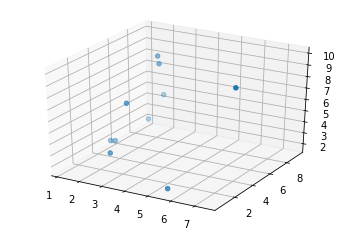

In [10]:
# Creación de figura tridimensional
fig = plt.figure()
# Añadimos los ejes
ax = fig.add_subplot(111, projection="3d")
ax.scatter(xs=data["star_wars"], ys=data["lord_of_the_rings"], zs=data["harry_potter"])

# Métodos de enlace

<img src="img/img_996.png" width=550/>

<img src="img/img_997.png" width=550/>

<img src="img/img_998.png" width=550/>

<img src="img/img_999.png" width=550/>

<img src="img/img_999(001).png" width=550/>

# Clustering jerárquico

<img src="img/img_999(002).png" width=550/>

<img src="img/img_999(003).png" width=550/>

# Dependiendo del tipo de enlace se generarán los clusters

<img src="img/img_999(004).png" width=550/>

# Clustering jerárquico

In [11]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

In [12]:
# Recordemos que teníamos en movies un array con las columnas que íbamos a utilizar
data[movies]

,star_wars,lord_of_the_rings,harry_potter
0,1.2,4.9,2.1
1,2.1,8.1,7.9
2,7.4,3.0,9.9
3,5.6,0.5,1.8
4,1.5,8.3,2.6
5,2.5,3.7,6.5
6,2.0,8.2,8.5
7,1.8,9.3,4.5
8,2.6,1.7,3.1
9,1.5,4.7,2.3


In [13]:
# Para enlazar estos datos solo tenemos que pasar el dataframe e indicar el método a utilizar
# para el cálculo de las distancias
Z = linkage(data[movies], method="ward")
Z

array([[ 0.        ,  9.        ,  0.41231056,  2.        ],
       [ 1.        ,  6.        ,  0.6164414 ,  2.        ],
       [ 4.        ,  7.        ,  2.16794834,  2.        ],
       [ 3.        ,  8.        ,  3.48281495,  2.        ],
       [ 5.        , 10.        ,  5.2943366 ,  3.        ],
       [13.        , 14.        ,  6.59317829,  5.        ],
       [11.        , 12.        ,  6.66408283,  4.        ],
       [ 2.        , 15.        , 10.62355873,  6.        ],
       [16.        , 17.        , 12.8156935 , 10.        ]])

Esto indica cómo se ha ido creando el cluster jerárquico.

* El usuario 0 y 9 se han unido a distancia 0.41. el último número indica dos elementos.
* El usuario 1 y 6 se han unido a distancia 0.61.
* Etc.

### Al array Z se le denomina el array de enlace

# Representación gráfica del dendrograma

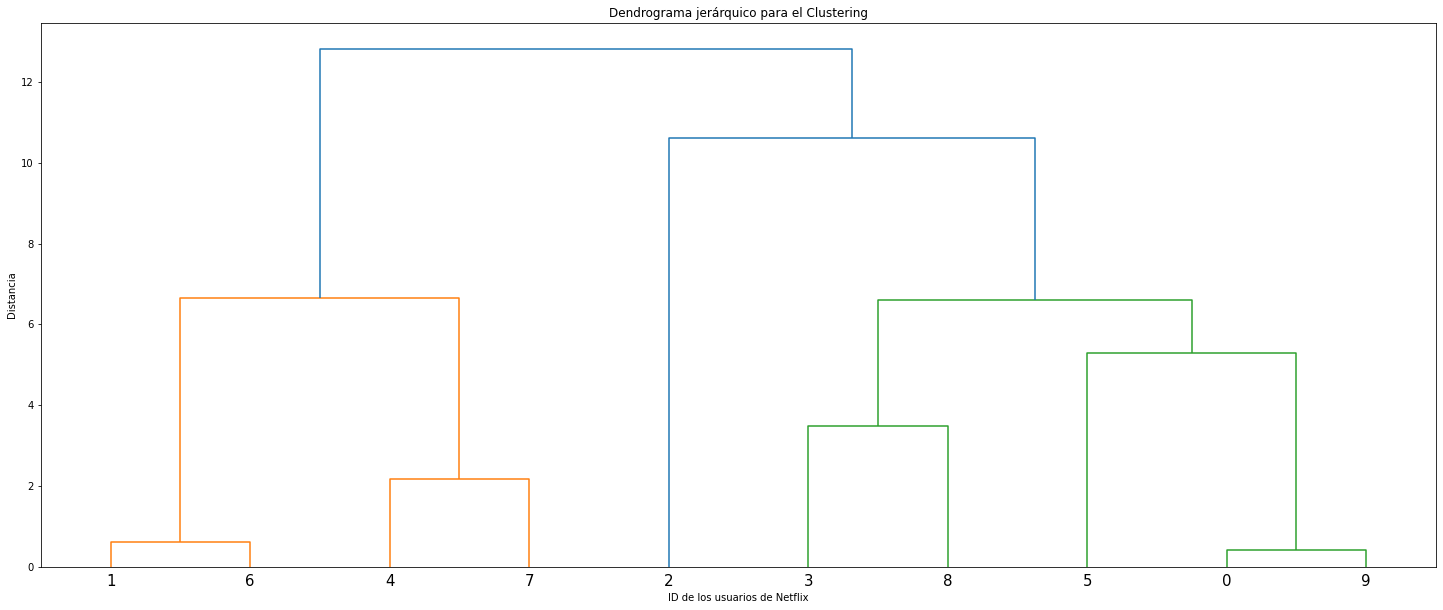

In [14]:
plt.figure(figsize=(25, 10))
plt.title("Dendrograma jerárquico para el Clustering")
plt.xlabel("ID de los usuarios de Netflix")
plt.ylabel("Distancia")
dendrogram(Z, leaf_font_size=15)
plt.show()

Podemos comprobar que si utilizamos otro método/distancia para definir los cluster, éstos cambian.

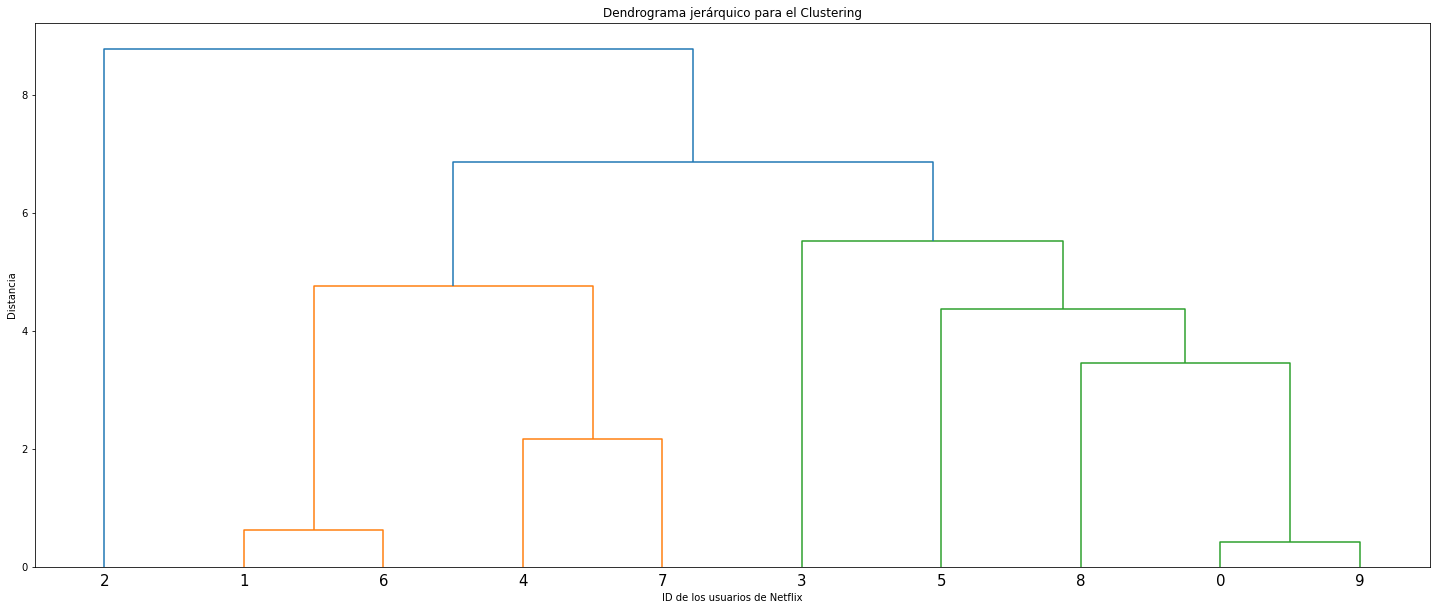

In [15]:
Z = linkage(data[movies], method="average")
plt.figure(figsize=(25, 10))
plt.title("Dendrograma jerárquico para el Clustering")
plt.xlabel("ID de los usuarios de Netflix")
plt.ylabel("Distancia")
dendrogram(Z, leaf_font_size=15)
plt.show()

# Clustering jerárquico y dendrogramas

Para generar los datos aleatorios ...

* mean: 1-D array_like, of length N. Mean of the N-dimensional distribution.
* cov: 2-D array_like, of shape (N, N). Covariance matrix of the distribution. It must be symmetric and positive-semidefinite for proper sampling.
* size: int or tuple of ints, optional. Given a shape of, for example, ``(m,n,k)``, ``m*n*k`` samples are
    generated, and packed in an `m`-by-`n`-by-`k` arrangement.  Because
    each sample is `N`-dimensional, the output shape is ``(m,n,k,N)``.

In [16]:
# Generemos datos de prueba para nuestros ejercicio de clusterización.
# Podemos utilizar librerías de scikit-learn o podemos generarlos a mano.

np.random.seed(42)
# 100 datos distribuidos normalmente en torno al valor de coordenadas (10,0),
# con una desviación típica de 3 unidades en horizontal y 4 en vertical
a = np.random.multivariate_normal(mean=[10, 0], cov=[[3, 1], [1, 4]], size=[100, ])
# 50 datos distribuidos normalmente en torno al valor de coordenadas (0, 20),
# con una desviación típica de 3 unidades en horizontal y 4 en vertical
b = np.random.multivariate_normal(mean=[0, 20], cov=[[3, 1], [1, 4]], size=[50, ])

In [17]:
# Concatenamos los valores y los respresentamos gráficamente
X = np.concatenate((a, b))
X.shape

(150, 2)

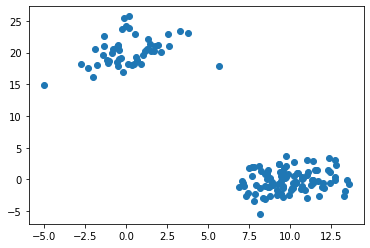

In [18]:
# Representación gráfica
plt.scatter(X[:, 0], X[:, 1])

# Generación de la matriz de enlaces

In [19]:
Z = linkage(X, "ward")
# Podemos probar con otros métodos y otras métricas para definir
# nuestra matriz de enlace
Z

array([[6.60000000e+01, 9.10000000e+01, 2.29888530e-02, 2.00000000e+00],
       [1.70000000e+01, 6.90000000e+01, 2.48102512e-02, 2.00000000e+00],
       [7.20000000e+01, 8.70000000e+01, 7.87761602e-02, 2.00000000e+00],
       [6.00000000e+00, 1.80000000e+01, 1.00921753e-01, 2.00000000e+00],
       [4.00000000e+01, 5.70000000e+01, 1.03917451e-01, 2.00000000e+00],
       [0.00000000e+00, 9.30000000e+01, 1.12890636e-01, 2.00000000e+00],
       [2.80000000e+01, 6.80000000e+01, 1.21888980e-01, 2.00000000e+00],
       [1.09000000e+02, 1.34000000e+02, 1.23176959e-01, 2.00000000e+00],
       [4.00000000e+00, 4.40000000e+01, 1.37213528e-01, 2.00000000e+00],
       [1.19000000e+02, 1.46000000e+02, 1.55692766e-01, 2.00000000e+00],
       [4.80000000e+01, 7.50000000e+01, 1.64265930e-01, 2.00000000e+00],
       [4.30000000e+01, 8.20000000e+01, 1.65672925e-01, 2.00000000e+00],
       [5.20000000e+01, 1.54000000e+02, 1.73354957e-01, 3.00000000e+00],
       [1.60000000e+01, 5.80000000e+01, 1.77226384e

Otra cosa que debemos hacer y comprobar es el **coeficiente de correlación de cophenet**. Lo que hace básicamente es comparar las distancias 2 a 2 de nuestras muestras con las que llevaron a cabo en el clusting jerárquico. Cuanto más cercano sea a 1, mejor será el clustering, ya que preservará las distancias originales que hubiera entre las diferentes observaciones.

## Coeficiente de correlación de cophenet

In [20]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

In [21]:
c, coph_dist = cophenet(Z, pdist(X))  # Pasamos la función de enlace y la función pdist para calcular la distancia
# original. En el parámetro c comprobamos que se conservan el 98% de las distancias.
c

0.9804692415551884

# Representación gráfica de un dendrograma

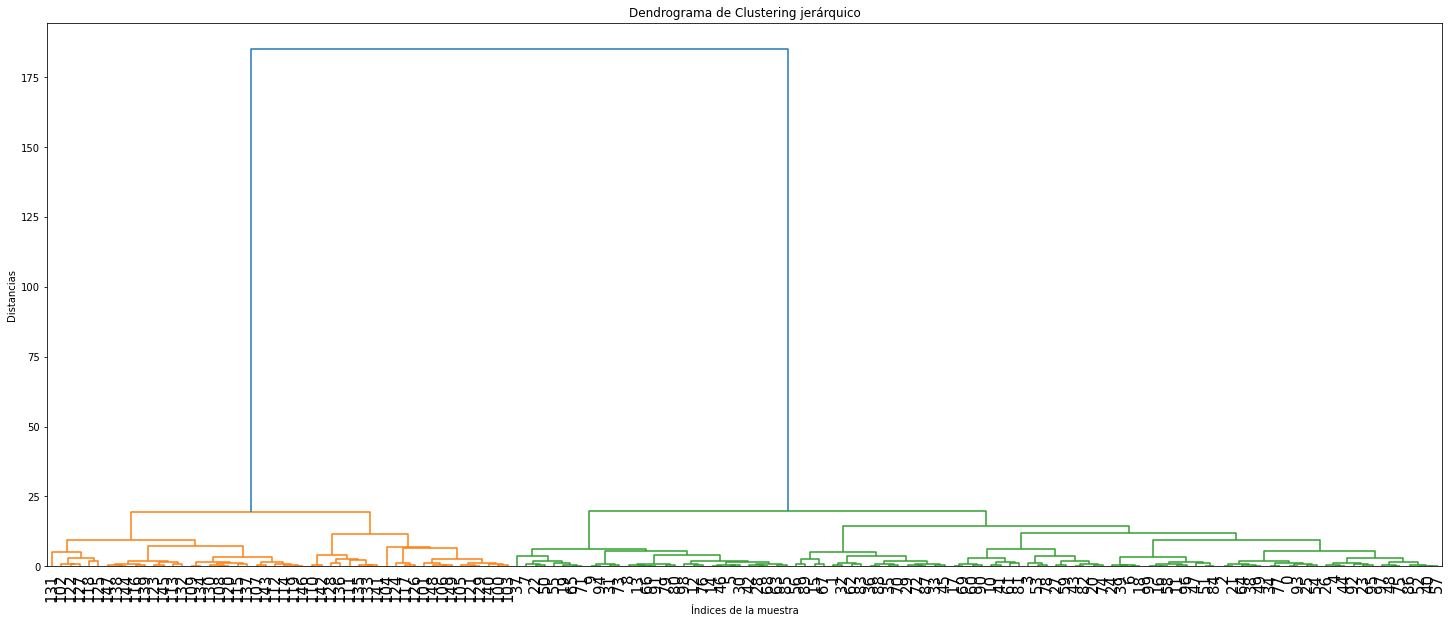

In [22]:
plt.figure(figsize=(25, 10))
plt.title("Dendrograma de Clustering jerárquico")
plt.xlabel("Índices de la muestra")
plt.ylabel("Distancias")
dendrogram(Z, leaf_font_size=15)
plt.show()

Esto que estamos viendo tiene sentido:

* Vemos dos clusters de color naranja y verde, que representan o agrupan los puntos más cercanos
* La altura de las líneas verticales indican la distancia a la que se han unido esos clusters
* Los dos clusters se unen en el cluster azul a una distancia elevada.

In [23]:
# Si estudiamos los últimos valores de la matriz de enlace ...
Z[-4:, ]

array([[282.        , 294.        ,  14.56089259,  70.        ],
       [291.        , 293.        ,  19.29245134,  50.        ],
       [286.        , 295.        ,  19.79198563, 100.        ],
       [296.        , 297.        , 185.21708953, 150.        ]])

Vemos que el último cluster se forma a una distancia de 185. Los anteriores a distancia de 14, 19, ...

Estos grandes saltos nos pueden indicar que **igual estamos uniendo en un mismo cluster algo que no debería ser unido** porque hay bastante distancia entre sus elementos.

**En nuestro caso, una buena segmentación hubiese sido tener el cluster verde y el cluster naranja.**

Otra cosa. Este ejemplo ha sido sencillo porque hay muy pocos datos. ¿Hay alguna forma de poder visualizar esto para otros escenarios más complejos y poder ganar visibilidad de los datos estudiados?. Sí, para ello hay que **truncar el dendrograma**.

# Truncar el dendrograma

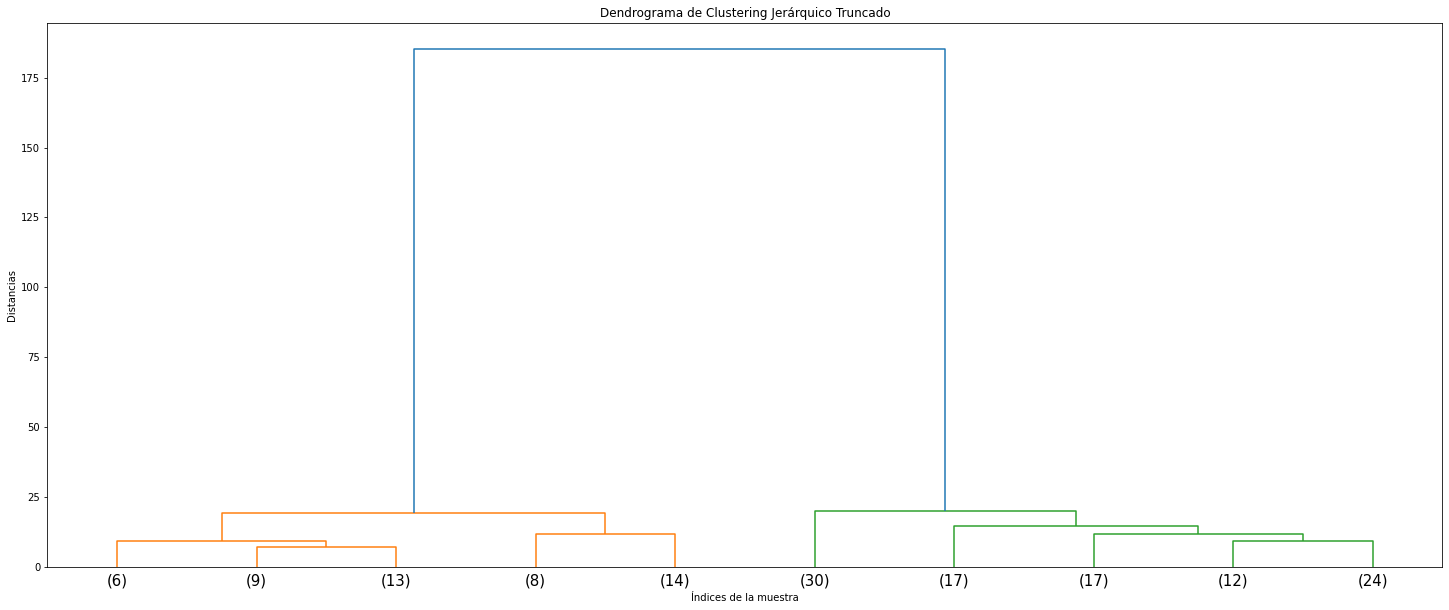

In [24]:
plt.figure(figsize=(25, 10))
plt.title("Dendrograma de Clustering Jerárquico Truncado")
plt.xlabel("Índices de la muestra")
plt.ylabel("Distancias")
# Indicamos truncate_mode, indicamos los últimos 10
dendrogram(Z, leaf_font_size=15, truncate_mode="lastp", p=10, show_leaf_counts=True, show_contracted=False)
plt.show()

# ¿Cómo decidir el número de clusters correctos partiendo del dendrograma?

* La opción manual siempre será válida
* Pero hay otras formas como aplicar el **método de la inconsistencia** que es el que utiliza python en sus algoritmos

Este método trata de analizar las distintas alturas a las que se unen los clusters y obtener a partir de ahí el punto de corte para obtener el nº de clusters apropiado.

## Corte automático del dendrograma

In [25]:
from scipy.cluster.hierarchy import inconsistent  # Nos dará la inconsistencia para todos los clusters
# que se han formado

In [26]:
depth = 5
incons = inconsistent(Z, depth)
incons

array([[2.29888530e-02, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [2.48102512e-02, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [7.87761602e-02, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.00921753e-01, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.03917451e-01, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.12890636e-01, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.21888980e-01, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.23176959e-01, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.37213528e-01, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.55692766e-01, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.64265930e-01, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.65672925e-01, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.38636204e-01, 4.90997310e-02, 2.00000000e+00, 7.07106781e-01],
       [1.77226384e-01, 0.00000000e+00, 1.00000000e

Con esto obtenemos

* El promedio
* La desviación estándar
* El número de elementos
* El factor de inconsistencia para cada una de las uniones

In [27]:
# Analicemos las 10 últimas
Z[-10:]

array([[104.        , 288.        ,   6.72950259,  14.        ],
       [267.        , 276.        ,   7.15364476,  22.        ],
       [283.        , 290.        ,   9.36162823,  28.        ],
       [275.        , 284.        ,   9.38529309,  36.        ],
       [281.        , 289.        ,  11.68389795,  22.        ],
       [287.        , 292.        ,  11.90653966,  53.        ],
       [282.        , 294.        ,  14.56089259,  70.        ],
       [291.        , 293.        ,  19.29245134,  50.        ],
       [286.        , 295.        ,  19.79198563, 100.        ],
       [296.        , 297.        , 185.21708953, 150.        ]])

# Método del codo

Buscamos el punto en el que la aceleración del clustering es mayor. Es decir, cuando la altura de la línea que une los clusters es mayor.

[185.21708953  19.79198563  19.29245134  14.56089259  11.90653966
  11.68389795   9.38529309   9.36162823   7.15364476   6.72950259]


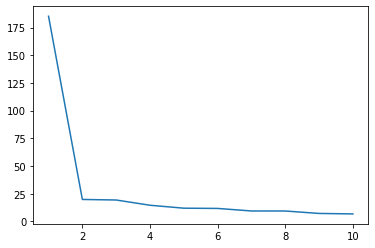

In [28]:
last = Z[-10:,2]
last_rev = last[::-1]  # con esto revertimos el orden
print(last_rev)
idx = np.arange(1, len(last) + 1)
plt.plot(idx, last_rev)

# Recuperar los clusters y sus elementos

In [29]:
from scipy.cluster.hierarchy import fcluster

In [30]:
# Defino la distancia máxima entre clusters
max_d = 20
clusters = fcluster(Z, max_d, criterion="distance")
clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

Nos indica el número de elementos que pertenecen a cada uno de los clusters.

Otro criterio es indicar el número de clusters que quiero.

In [31]:
k = 3
clusters = fcluster(Z, k, criterion="maxclust")
clusters

array([3, 3, 3, 3, 3, 2, 3, 2, 2, 2, 3, 3, 2, 2, 2, 3, 3, 3, 3, 2, 3, 3,
       2, 3, 3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3,
       3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2,
       2, 3, 2, 3, 3, 2, 3, 2, 3, 3, 2, 3, 3, 2, 2, 3, 3, 3, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [32]:
# Con el parámetro de inconsistencia, es el que viene por defecto
fcluster(Z, 8, depth=10)  # Con 8 indicamos el mínimo nº de elementos que tiene que tener el cluster

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

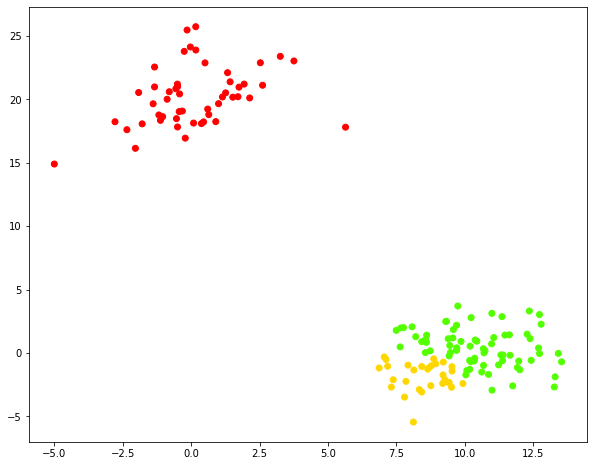

In [33]:
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap="prism")

# Método k-means

* Definimos baricentros de forma aleatoria y realizamos la primera agrupación, cada observación se asocia al baricentro más cercano.
* Una vez generados los k-clusters, repetimos la operación pero recalculando primero todos los baricentros de los clusters. Así, de forma progresiva, tendremos calculados los baricentros que determinarán los k-clusters y que minimizarán la suma de las distancias de cada observación respecto a su cluster.

<img src="img/img_999(008).png" width=550/>

## ¿Cómo determinar el número de clusters correcto?

Mediante el método del codo. Trata de obtener la máxima distancia existente entre todos los puntos de un mismo cluster.

<img src="img/img_999(006).png" width=550/>

Y generar un gráfico que nos dirá de forma fácil, cuál es el número correcto de clusters.

<img src="img/img_999(007).png" width=550/>

<img src="img/img_999(005).png" width=750/>

In [34]:
# Definamos un conjunto de datos aleatorios entre 0 y 1
data = np.random.random(90).reshape(30, 3)
data[:5] # Vemos las 5 primeras filas

array([[0.28203457, 0.17743954, 0.75061475],
       [0.80683474, 0.99050514, 0.41261768],
       [0.37201809, 0.77641296, 0.34080354],
       [0.93075733, 0.85841275, 0.42899403],
       [0.75087107, 0.75454287, 0.10312387]])

Con k-means, tenemos que definir a priori cuántos clusters queremos. Vamos a decidir que queremos 2 clusters y elegiremos dos centroides al azar.

In [35]:
c1 = np.random.choice(range(len(data))) # Elijo un número al azar entre el 0 y el 29
c2 = np.random.choice(range(len(data)))

In [36]:
c1, c2

(4, 3)

In [37]:
# Los centroides correspondientes son:
data[c1], data[c2]

(array([0.75087107, 0.75454287, 0.10312387]),
 array([0.93075733, 0.85841275, 0.42899403]))

In [38]:
# Vamos a utilizar es librería de scipy.cluster. Nos dará la visión de pertenencia a un cluster
from scipy.cluster.vq import vq

A esta función le podemos pasar nuestras observaciones, los distintos centroides que hemos definido, y obtenemos como resultado las distancias de las observaciones a los centroides. **Ojo, las observaciones deben estar normalizadas y deben tener un valor asignado entre 0 y 1**.

In [39]:
# Agrupamos los centroides en un array
clust_centers = np.vstack([data[c1], data[c2]])
clust_centers

array([[0.75087107, 0.75454287, 0.10312387],
       [0.93075733, 0.85841275, 0.42899403]])

In [40]:
vq(data, clust_centers)

(array([0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
        0, 0, 0, 1, 0, 1, 0, 1], dtype=int32),
 array([0.9859515 , 0.18186091, 0.44777172, 0.        , 0.        ,
        0.53244242, 0.53602529, 0.75534231, 0.80891483, 0.40716859,
        0.84559771, 0.40784423, 0.71056161, 0.72769564, 0.75361114,
        0.13675401, 0.66960175, 0.08858072, 0.75563878, 0.76445886,
        0.12986552, 0.80819203, 0.36029367, 0.86754731, 0.94168894,
        0.34018646, 0.47131499, 0.83201939, 0.77179496, 0.65498283]))

* El primer array nos indica a que cluster pertenece cada una de las observaciones.
* El segundo array nos da la distancia de cada una de las observaciones al centroide del cluster.

In [41]:
from scipy.cluster.vq import kmeans  # Implementa un kmeans

In [42]:
kmeans(data, clust_centers)

(array([[0.32587231, 0.6042728 , 0.27361104],
        [0.74909419, 0.66464433, 0.70373125]]),
 0.4234660110212932)

Este método implementa el algoritmo de kmeans, nos devuelve los centroides calculados con k=2. El último número es la suma de los cuadrados de los errores.

# Ejercicio: segmentación de los vinos

## Carga del dataset

In [43]:
df = pd.read_csv("datasets/wine/winequality-red.csv", sep=";")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [44]:
df.shape

(1599, 12)

In [45]:
# Dibujemos un histograma con la calidad del vino

(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <a list of 10 Patch objects>)

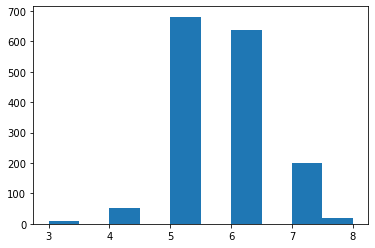

In [46]:
plt.hist(df["quality"])

In [47]:
# Hagamos un cruce de la calidad con los promedios de los distintos compuestos del vino
df.groupby("quality").mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


Podemos ver:

* que la "volatile acidity" influye negativamente.
* que "chlorides" influye también negativamente.
* que "sulphates" influye positivamente.
* que "citric acid" influye positivamente.

Y que otras variables no influyen mucho.

## Normalización de los datos

Las estrategias de clustering se basan en estudiar distancias. Para evitar que algunas 'features' se impongan sobre otras, **es fundamental la normalización de los datos**.

In [48]:
df_norm = (df - df.min()) / (df.max() - df.min())
df_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4


## Clustering jerárquico con scikit-learn

In [49]:
from sklearn.cluster import AgglomerativeClustering

In [50]:
clus = AgglomerativeClustering(n_clusters=6, linkage="ward").fit(df_norm)

### Labels obtenidos

Veamos a qué cluster pertenece cada observación

In [51]:
clus.labels_

array([2, 2, 2, ..., 4, 4, 0])

Text(0, 0.5, 'Número de vinos del cluster')

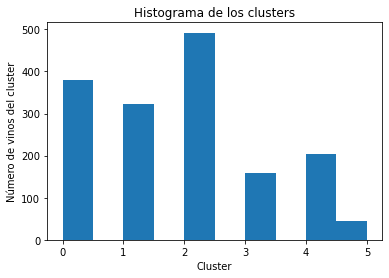

In [52]:
# Veamos un histograma con el número de elementos de cada cluster
plt.hist(clus.labels_)
plt.title("Histograma de los clusters")
plt.xlabel("Cluster")
plt.ylabel("Número de vinos del cluster")

### Elementos del cluster jerárquico

In [53]:
clus.children_

array([[   0,    4],
       [ 135,  140],
       [ 750,  751],
       ...,
       [3179, 3191],
       [3192, 3193],
       [3194, 3195]])

In [54]:
clus.children_.shape

(1598, 2)

### Dendrograma

In [55]:
Z = linkage(df_norm, "ward")

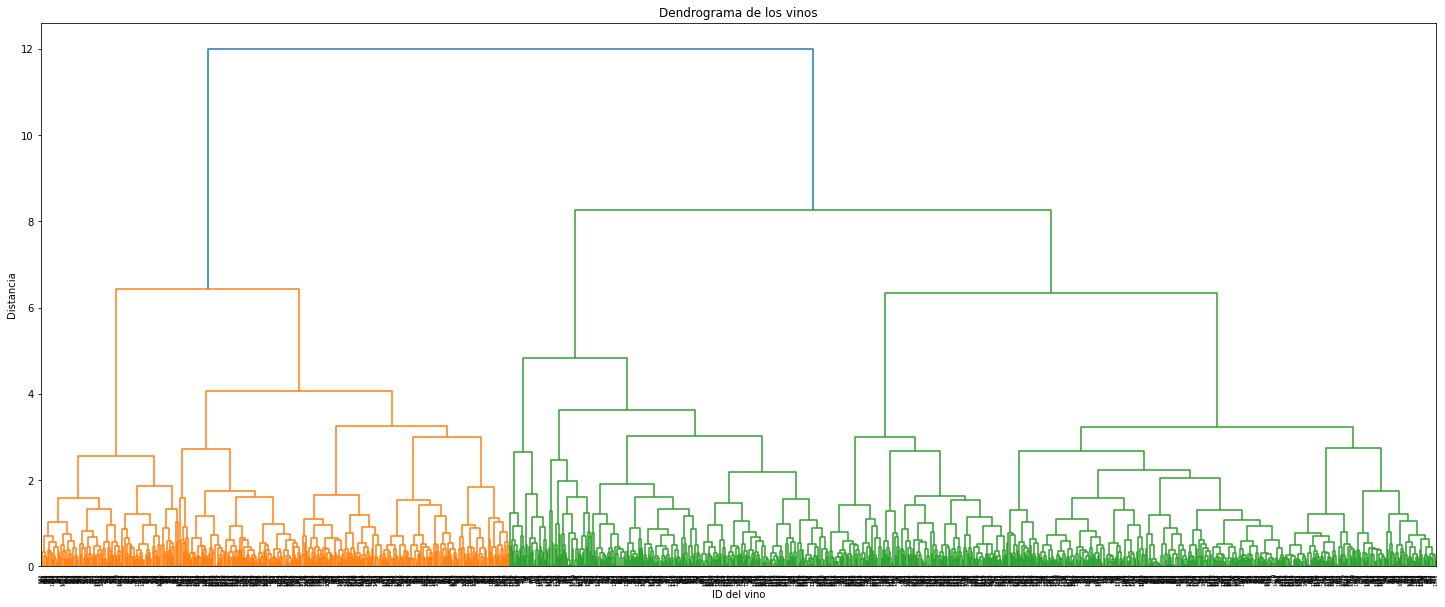

In [56]:
plt.figure(figsize=(25, 10))
plt.title("Dendrograma de los vinos")
plt.xlabel("ID del vino")
plt.ylabel("Distancia")
dendrogram(Z)
plt.show()

Para conseguir 6 clusters tendríamos que cortar a una altura determinada.

## Clustering con K-means

In [57]:
from sklearn.cluster import KMeans

In [58]:
model = KMeans(n_clusters=6)
model.fit(df_norm)

KMeans(n_clusters=6)

### Labels obtenidos

Con esto vemos a qué categoría pertenece cada uno de los vinos

In [59]:
model.labels_

array([2, 2, 2, ..., 4, 4, 3], dtype=int32)

Vamos a agregar ahora al dataframe, el cluster al que pertenece cada observación con dos nuevas columnas (una por cada modelo)

In [60]:
df_norm["cluster_h"] = clus.labels_  # Recordemos que este es el que utilizamos en el cluster jerárquico
df_norm["cluster_k"] = model.labels_

In [61]:
df_norm.head()  # El Id del cluster puede variar. Lo que no puede variar son los clusters a los que pertenecen

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,cluster_h,cluster_k
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4,2,2
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4,2,2
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4,2,2
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6,3,1
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4,2,2


### Obtención de los baricentros normalizados

In [62]:
model.cluster_centers_

array([[0.31615802, 0.27819741, 0.30367601, 0.15109034, 0.12690933,
        0.37876793, 0.29641249, 0.53832553, 0.43665219, 0.1784655 ,
        0.21436217, 0.45358255],
       [0.58242935, 0.20579706, 0.51197581, 0.13400354, 0.13117965,
        0.13908451, 0.09183005, 0.65596431, 0.33194691, 0.22249855,
        0.29185277, 0.54758065],
       [0.26288805, 0.36009866, 0.11775794, 0.09152125, 0.12257864,
        0.14479935, 0.10721297, 0.49071161, 0.48729846, 0.15502329,
        0.22069088, 0.44087302],
       [0.36148029, 0.16073474, 0.41854545, 0.10438356, 0.10601912,
        0.15984635, 0.08353357, 0.41547991, 0.42073014, 0.23560152,
        0.47865734, 0.69090909],
       [0.17374765, 0.32511002, 0.09027149, 0.09344201, 0.09552875,
        0.25205532, 0.1239787 , 0.32289154, 0.58039691, 0.18600807,
        0.49163476, 0.61266968],
       [0.33716814, 0.29223744, 0.48133333, 0.07557078, 0.53789649,
        0.20938967, 0.21071849, 0.5143906 , 0.2335958 , 0.59001996,
        0.16512821,

Podemos ver que aparecen 6 filas, una por cada cluster. En cada fila hay 12 dimensiones con el centro de cada una de ellas. Cada variable pertenece a una *feature* del dataset.

### Suma de los cuadrados internos

In [63]:
model.inertia_

186.5430210479089

## Interpretación final

In [64]:
# Promedio de la composición de cada cluster
df_norm.groupby("cluster_k").mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,cluster_h
cluster_k,,,,,,,,,,,,,
0,0.316158,0.278197,0.303676,0.151090,0.126909,0.378768,0.296412,0.538326,0.436652,0.178465,0.214362,0.453583,1.049844
1,0.582429,0.205797,0.511976,0.134004,0.131180,0.139085,0.091830,0.655964,0.331947,0.222499,0.291853,0.547581,2.036290
2,0.262888,0.360099,0.117758,0.091521,0.122579,0.144799,0.107213,0.490712,0.487298,0.155023,0.220691,0.440873,2.023810
3,0.361480,0.160735,0.418545,0.104384,0.106019,0.159846,0.083534,0.415480,0.420730,0.235602,0.478657,0.690909,0.138182
4,0.173748,0.325110,0.090271,0.093442,0.095529,0.252055,0.123979,0.322892,0.580397,0.186008,0.491635,0.612670,3.479638
5,0.337168,0.292237,0.481333,0.075571,0.537896,0.209390,0.210718,0.514391,0.233596,0.590020,0.165128,0.466667,4.900000


# Ajustando los parámetros del cluster

Es muy importante que el número de cluster seleccionado sea el adecuado.

## Método del codo

<img src="img/img_999(010).png" width=750/>

El número de clusters debería ser el punto en el que los errores (la suma de las diferencias al baricentro al cuadrado de cada cluster) empieza a estabilizarse.

## Método de la silueta

<img src="img/img_999(011).png" width=750/>

<img src="img/img_999(012).png" width=650/>

<img src="img/img_999(013).png" width=650/>

<img src="img/img_999(014).png" width=650/>

<img src="img/img_999(015).png" width=650/>

# Implementación del método del codo y el coeficiente de silueta

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist  # Compute distance between each pair of the two collections of inputs.
from sklearn.metrics import silhouette_samples, silhouette_score

In [66]:
# Definimos los datos de prueba para nuestro cluster
x1 = np.array([3, 1, 1, 2, 1, 6, 6, 6, 5, 6, 7, 8, 9, 8, 9, 9, 8])
x2 = np.array([5, 4, 5, 6, 5, 8, 6, 7, 6, 7, 1, 2, 1, 2, 3, 2, 3])

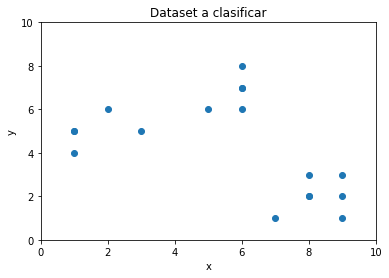

In [67]:
# Representemos gráficamente estos puntos
plt.plot()
plt.xlim([0, 10])
plt.ylim([0, 10])
plt.title("Dataset a clasificar")
plt.xlabel("x")
plt.ylabel("y")
plt.scatter(x1, x2)

In [68]:
# Defino todos los datos agrupados en X, será nuestro DataSet
X = np.array(list(zip(x1, x2)))
X

array([[3, 5],
       [1, 4],
       [1, 5],
       [2, 6],
       [1, 5],
       [6, 8],
       [6, 6],
       [6, 7],
       [5, 6],
       [6, 7],
       [7, 1],
       [8, 2],
       [9, 1],
       [8, 2],
       [9, 3],
       [9, 2],
       [8, 3]])

In [69]:
# Maximo numero de clusters que vamos a crear
max_k = 10
# Defino rango sobre el que iterar
K = range(1, max_k)  # Empezará en 1 que no tiene mucho sentido. Podríamos haber empezado en 2
# Termina en 9, no en 10. Si queremos que acabe en 10 tendremos que sumar uno más.

# Definimos la suma de los cuadrados internos para luego poder hacer el gráfico del codo
SSW = []
# Definimos una paleta de colores, con tantos colores como el nº de clusters que vamos a crear
# Esto será para tener unos colores consistentes a lo largo del ejercicio
color_palette = [plt.cm.Spectral(float(i)/max_k) for i in K]

In [70]:
# Definimos también unos centroides. Tomo el punto medio y lo replicamos tantas veces como clusters vayamos a crear
centroid = [sum(X)/len(X) for i in K]
centroid

[array([5.58823529, 4.29411765]),
 array([5.58823529, 4.29411765]),
 array([5.58823529, 4.29411765]),
 array([5.58823529, 4.29411765]),
 array([5.58823529, 4.29411765]),
 array([5.58823529, 4.29411765]),
 array([5.58823529, 4.29411765]),
 array([5.58823529, 4.29411765]),
 array([5.58823529, 4.29411765])]

In [71]:
# Definimos ahora la suma de los cuadrados totales. Antes veamos cómo funciona la función Compute Distance cdist
cdist([[0, 0], [-1, -1]], [[0, 0], [1, 0], [1, 1], [0, 1]], "euclidean")

array([[0.        , 1.        , 1.41421356, 1.        ],
       [1.41421356, 2.23606798, 2.82842712, 2.23606798]])

En este caso calcula la distancia euclídea entre todos los puntos de entrada (dos en este caso) y todos los puntos de salida (4 en este caso). El resultado es un array de dimensión 2x4 en el que en cada posición tendremos la distancia del elemento i-ésimo del primer array al elemento j-ésimo del segundo array.

In [72]:
# Definimos ahora la suma de los cuadrados totales.
# 1.- Calculamos la matriz de distancias de cada punto del dataset a los centroides
# Tenemos 17 puntos de entrada y 9 centroides, obtendremos una matriz de 17x9

In [73]:
distancias_a_centroides = cdist(X, centroid, "euclidean")
distancias_a_centroides  # Vemos que todos los valores son lo mismo

array([[2.68276571, 2.68276571, 2.68276571, 2.68276571, 2.68276571,
        2.68276571, 2.68276571, 2.68276571, 2.68276571],
       [4.59765248, 4.59765248, 4.59765248, 4.59765248, 4.59765248,
        4.59765248, 4.59765248, 4.59765248, 4.59765248],
       [4.64221639, 4.64221639, 4.64221639, 4.64221639, 4.64221639,
        4.64221639, 4.64221639, 4.64221639, 4.64221639],
       [3.97309289, 3.97309289, 3.97309289, 3.97309289, 3.97309289,
        3.97309289, 3.97309289, 3.97309289, 3.97309289],
       [4.64221639, 4.64221639, 4.64221639, 4.64221639, 4.64221639,
        4.64221639, 4.64221639, 4.64221639, 4.64221639],
       [3.728688  , 3.728688  , 3.728688  , 3.728688  , 3.728688  ,
        3.728688  , 3.728688  , 3.728688  , 3.728688  ],
       [1.75487458, 1.75487458, 1.75487458, 1.75487458, 1.75487458,
        1.75487458, 1.75487458, 1.75487458, 1.75487458],
       [2.73703297, 2.73703297, 2.73703297, 2.73703297, 2.73703297,
        2.73703297, 2.73703297, 2.73703297, 2.73703297],


In [74]:
# Obtenemos la mínima distancia por filas np.min(distancias_a_centroides)
minimos_distancias_a_centroides = np.min(distancias_a_centroides, axis=1)
minimos_distancias_a_centroides

array([2.68276571, 4.59765248, 4.64221639, 3.97309289, 4.64221639,
       3.728688  , 1.75487458, 2.73703297, 1.80445431, 2.73703297,
       3.58389323, 3.32860102, 4.74250456, 3.32860102, 3.64895586,
       4.11133971, 2.73703297])

In [75]:
# Calculamos finalmente la suma de los cuadrados totales
sst = sum(minimos_distancias_a_centroides)
sst

58.78095505364269

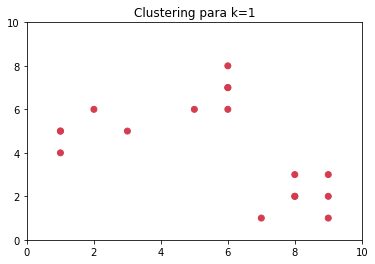

* Para k =  2  el promedio de la silueta es de :  0.6113424368705715
   - Para i =  0  la silueta del cluster vale:  0.7746251901389686
   - Para i =  1  la silueta del cluster vale:  0.49704450958269375


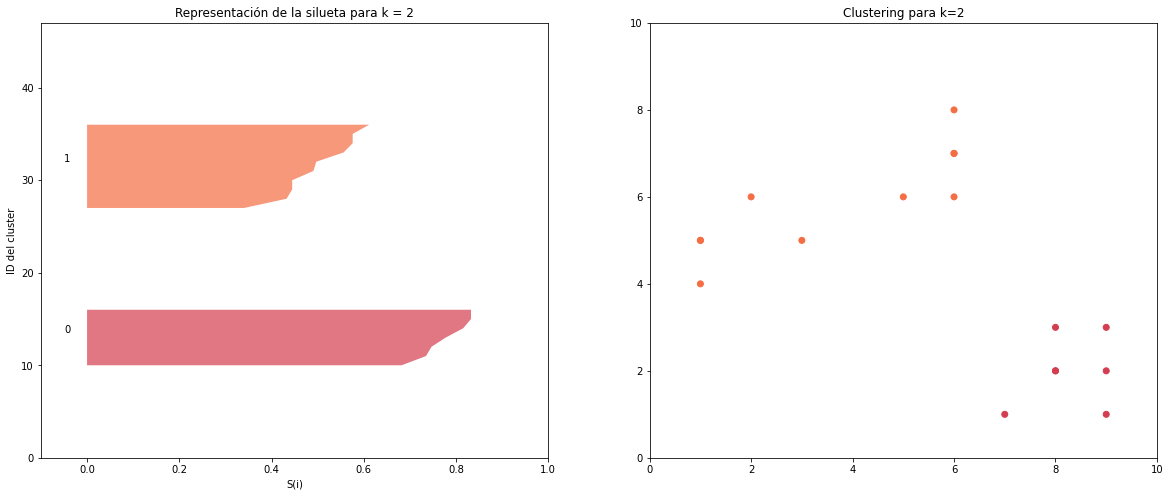

* Para k =  3  el promedio de la silueta es de :  0.7122079383287169
   - Para i =  0  la silueta del cluster vale:  0.7322200728725188
   - Para i =  1  la silueta del cluster vale:  0.7345257364682265
   - Para i =  2  la silueta del cluster vale:  0.6609508863896014


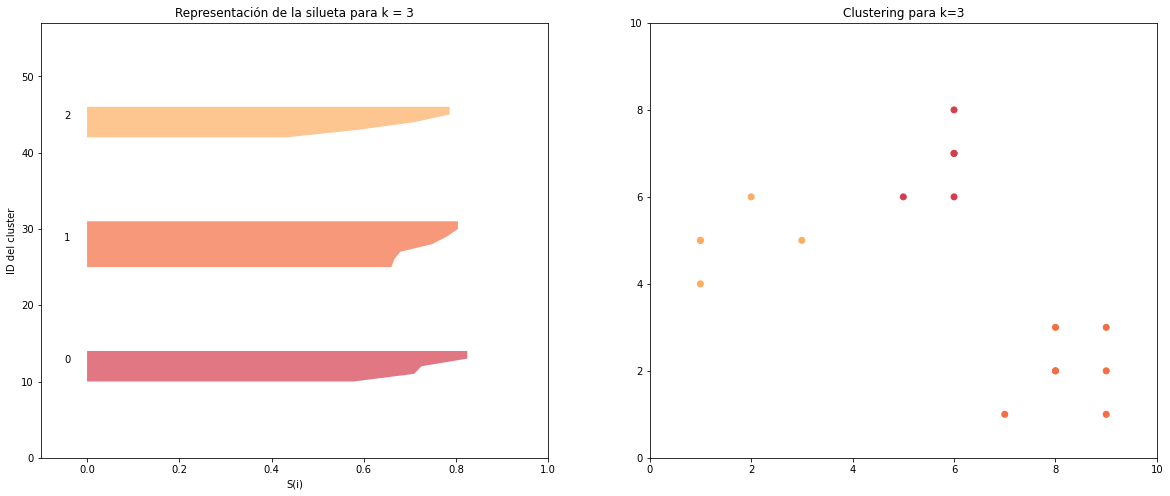

* Para k =  4  el promedio de la silueta es de :  0.6389948643127632
   - Para i =  0  la silueta del cluster vale:  0.7345257364682265
   - Para i =  1  la silueta del cluster vale:  0.655666655624379
   - Para i =  2  la silueta del cluster vale:  0.654458796162702
   - Para i =  3  la silueta del cluster vale:  0.24096929517637128


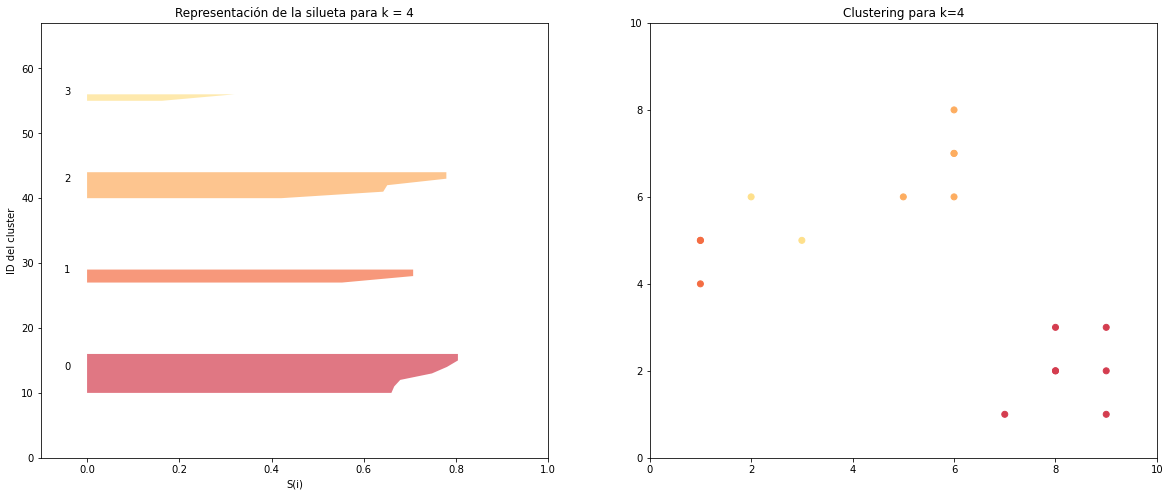

* Para k =  5  el promedio de la silueta es de :  0.42883912423017356
   - Para i =  0  la silueta del cluster vale:  0.2698039021743969
   - Para i =  1  la silueta del cluster vale:  0.655666655624379
   - Para i =  2  la silueta del cluster vale:  0.654458796162702
   - Para i =  3  la silueta del cluster vale:  0.1899052168375926
   - Para i =  4  la silueta del cluster vale:  0.24096929517637128


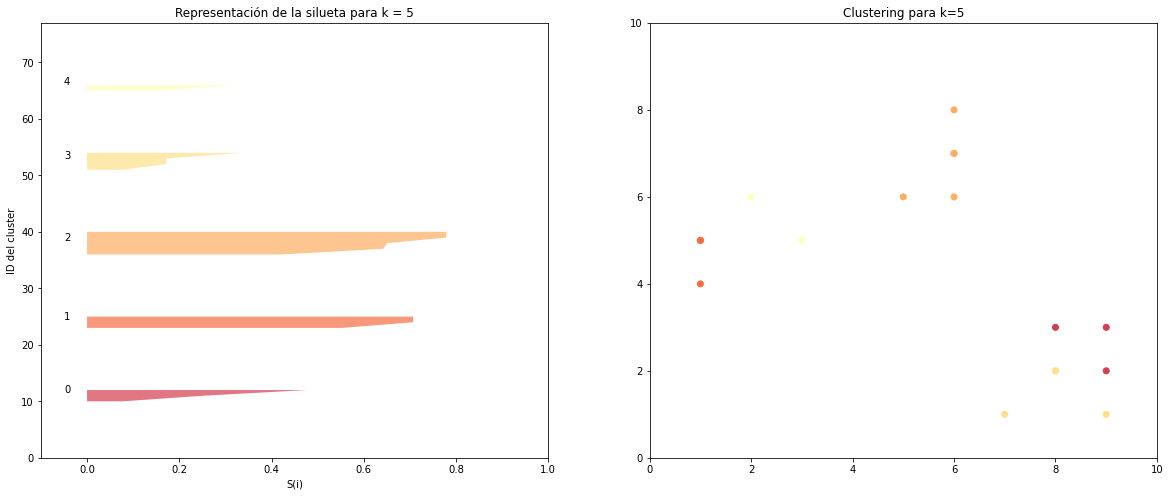

* Para k =  6  el promedio de la silueta es de :  0.4159974962395202
   - Para i =  0  la silueta del cluster vale:  0.32882042637679976
   - Para i =  1  la silueta del cluster vale:  0.37765685097302226
   - Para i =  2  la silueta del cluster vale:  0.655666655624379
   - Para i =  3  la silueta del cluster vale:  0.0
   - Para i =  4  la silueta del cluster vale:  0.5664789734180768
   - Para i =  5  la silueta del cluster vale:  0.24096929517637128


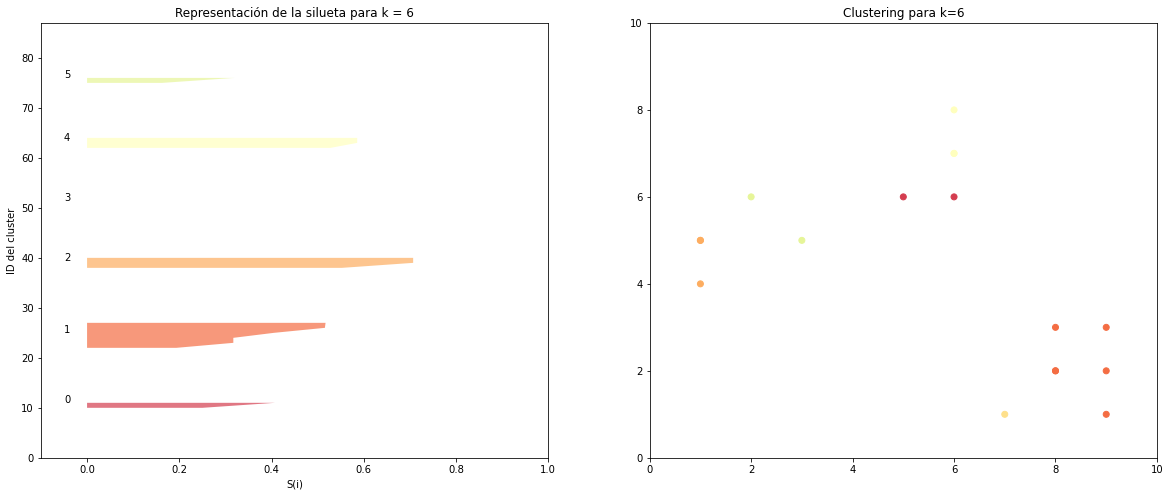

* Para k =  7  el promedio de la silueta es de :  0.3883319447429514
   - Para i =  0  la silueta del cluster vale:  0.31700053499298475
   - Para i =  1  la silueta del cluster vale:  0.24096929517637128
   - Para i =  2  la silueta del cluster vale:  0.5664789734180768
   - Para i =  3  la silueta del cluster vale:  0.655666655624379
   - Para i =  4  la silueta del cluster vale:  0.32882042637679976
   - Para i =  5  la silueta del cluster vale:  0.263812295212263
   - Para i =  6  la silueta del cluster vale:  0.0


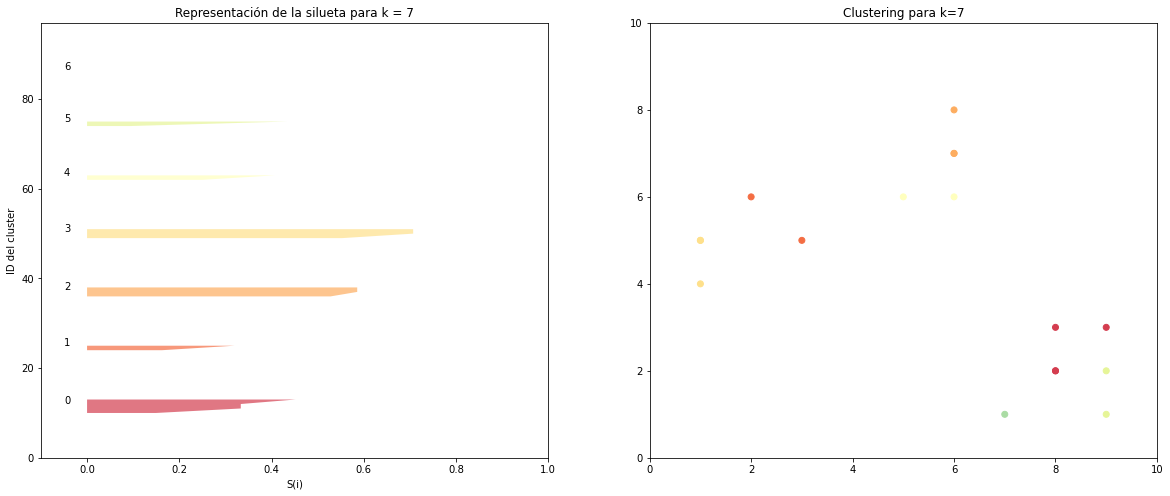

* Para k =  8  el promedio de la silueta es de :  0.3846391401618392
   - Para i =  0  la silueta del cluster vale:  0.31256470041698214
   - Para i =  1  la silueta del cluster vale:  0.0
   - Para i =  2  la silueta del cluster vale:  0.5664789734180768
   - Para i =  3  la silueta del cluster vale:  0.6152265411044983
   - Para i =  4  la silueta del cluster vale:  0.3869086846339371
   - Para i =  5  la silueta del cluster vale:  0.0
   - Para i =  6  la silueta del cluster vale:  0.32882042637679976
   - Para i =  7  la silueta del cluster vale:  0.2751262658470836


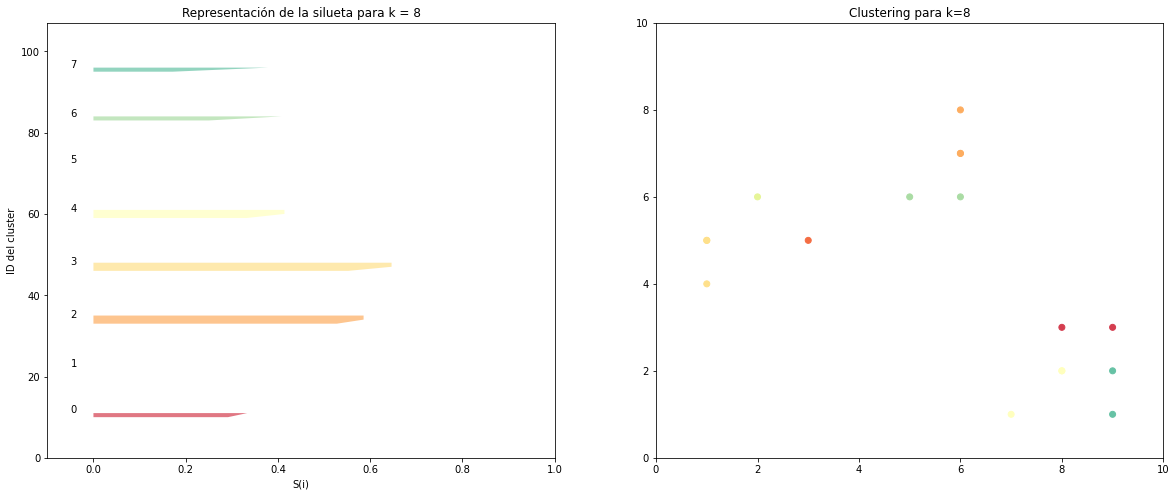

* Para k =  9  el promedio de la silueta es de :  0.2951357451541163
   - Para i =  0  la silueta del cluster vale:  0.5664789734180768
   - Para i =  1  la silueta del cluster vale:  0.2036375678246629
   - Para i =  2  la silueta del cluster vale:  0.6152265411044983
   - Para i =  3  la silueta del cluster vale:  0.32882042637679976
   - Para i =  4  la silueta del cluster vale:  0.0
   - Para i =  5  la silueta del cluster vale:  0.0
   - Para i =  6  la silueta del cluster vale:  0.0
   - Para i =  7  la silueta del cluster vale:  0.0
   - Para i =  8  la silueta del cluster vale:  0.0


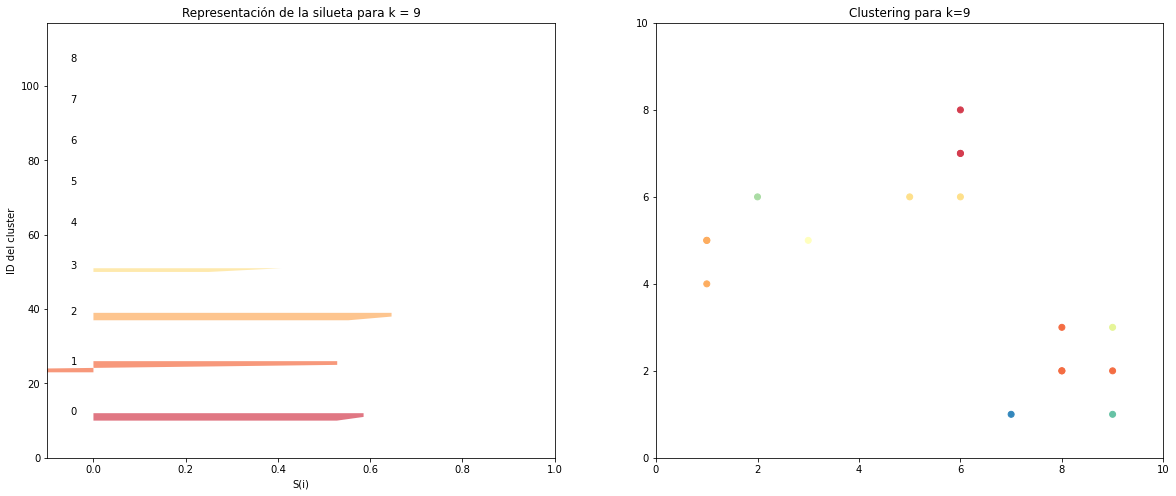

In [76]:
SSW = []

# Ahora hay que hacer k-means para cada cluster
for k in K:
    
    # Primero creamos el modelo de datos
    kmeanModel = KMeans(n_clusters=k).fit(X)
    centers = kmeanModel.cluster_centers_  # Centroides de cada cluster
    labels = kmeanModel.labels_  # A qué cluster pertenece cada observación
    
    # Para este modelo, podemos calcular la suma de los cuadrados de las diferencias SSW
    # Y agregarlo a nuestro array SSW
    ssw_k = sum(np.min(cdist(X, centers, "euclidean"), axis=1))
    SSW.append(ssw_k)
    
    # Coloración
    label_color = [color_palette[i] for i in labels]
    
    # Fabricaremos una silueta para cada cluser. Solo habrá un caso en el que no podremos fabricar silueta
    # y es cuando K = 1. También evitaremos calcularlo cuando hay tantos clusters como elementos en el dataset
    if 1 < k < len(X):
        # Creamos un subplot de una fila y dos columnas. Pintaremos la silueta por un lado y la
        # segmentación del cluster por otro.
        fig, (axis1, axis2) = plt.subplots(1, 2)
        fig.set_size_inches(20, 8)
        
        # El primer subplot contendrá la silueta, que puede tener valores desde -1 a 1
        axis1.set_xlim([-0.1, 1.0]) # Ponemos el límite inferior a -0.1 porque no se revasará ese valor
        
        # El número de clusters a insertar, determinará el tamaño de cada barra
        axis1.set_ylim([0, len(X) + (k + 1) * 10])  # Esto último nos permitirá dejar cierto espacio entre los
        # distintos coeficientes de silueta.
        
        # Computamos 
        silhouette_avg = silhouette_score(X, labels)
        
        # Obtenemos resultados
        print("* Para k = ", k, " el promedio de la silueta es de : ", silhouette_avg)
        sample_silhouette_values = silhouette_samples(X, labels)
        
        # Ahora recorremos cada cluster y vamos calculando la silueta para la representación
        y_lower = 10
        for i in range(k):
            # Agregamos la silueta del cluster i-ésimo
            ith_cluster_sv = sample_silhouette_values[labels == i]
            print("   - Para i = ", i, " la silueta del cluster vale: ", np.mean(ith_cluster_sv))
            # Ordenamos de forma descendente las siluetas del cluster i-ésimo
            ith_cluster_sv.sort()
            
            # Calculamos donde colocar la primera silueta en el eje vertical
            ith_cluster_size = ith_cluster_sv.shape[0] # Me quedo con el número de filas
            y_upper = y_lower + ith_cluster_size  # Esto es para que quede escalado en el eje vertical
            
            # Coloración
            color = color_palette[i]
            
            axis1.fill_betweenx(np.arange(y_lower, y_upper),
                               0, ith_cluster_sv, facecolor=color, alpha=0.7)
            
            # Etiquetamos dicho cluster con el número en el centro
            axis1.text(-0.05, y_lower + 0.5*ith_cluster_size, str(i))
            
            # Calculamos el nuevo y_lower para el siguiente cluster del gráfico
            y_lower = y_upper + 10  # Dejamos vacías 10 posiciones sin muestra
        
        axis1.set_title("Representación de la silueta para k = %s"%str(k))
        axis1.set_xlabel("S(i)")
        axis1.set_ylabel("ID del cluster")
        
    # Plot de los k-means con los puntos respectivos
    plt.plot()
    plt.xlim([0, 10])
    plt.ylim([0, 10])
    plt.title("Clustering para k=%s"%str(k))
    plt.scatter(x1, x2, c=label_color)
    # Faltaría dibujar los centroides
    # plt.scatter(centers[0], centers[1], c=color_palette, marker="x")
    plt.show()
  

# Representación del codo

In [77]:
# Tenemos en el array SSW los distintos valores obtenidos para cada nº de clusters
SSW

[58.7809550536427,
 30.068603074789642,
 14.993812485620728,
 12.898136040931194,
 11.683961285028,
 9.874965208383035,
 8.659319031030599,
 7.552284749830793,
 5.954912277937403]

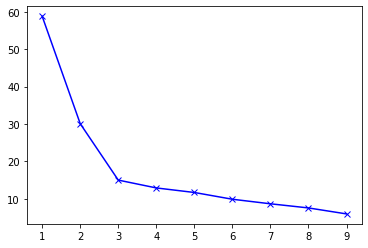

In [78]:
plt.plot(K, SSW, "bx-")

Se ve claramente que el mejor valor es k=3

# Propagación de la afinidad

Es un nuevo algoritmo que se basa en crear clusterings con una técnica denominada de transferencia de mensajes o de pase de mensajes entre los puntos de datos del dataset. Intenta encontrar de forma automática el nº de clusters a partir de los puntos del dataset.

<img src="img/img_999(016).png" width=450/>

Toma una matriz de similitud que denominamos S que es la inversa de las distancias euclideas. **Puntos muy cercanos tienen una similitud muy elevada.**

Lleva a cabo una serie de pasos después de lo que llamamos 'inicializar' la **matriz de responsabilidad** y la **matriz de disponibilidad** a cero.

Las resonsabilidades elevadas tienden a aparecer entre puntos que son muy parecidos entre ellos.

* i es el punto que intento ubicar en un cluster
* k es el cluster potencial, es el centro respecto del cual intento a ver si puedo asignar o no i
* s es la similaridad entre i y k
* a es la disponibilidad que se define según la fórmula

Luego se calcula la disponibilidad para el punto k como centro del cluster para cualquier otro punto i, representando así cómo de apropiado será k para ser asignado como centro del cluster para i y juzgando si puede ser o no centro para otros puntos también.

Los puntos que se elijan con mayor responsabilidad por otro punto tienen también una elevada disponibilidad.

# Implementación de la propagación de la afinidad

In [80]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs

In [108]:
# Generemos datos aleatorios
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels = make_blobs(n_samples=300, centers=centers, cluster_std=0.5, random_state=0)

In [109]:
import matplotlib.pyplot as plt
from itertools import cycle

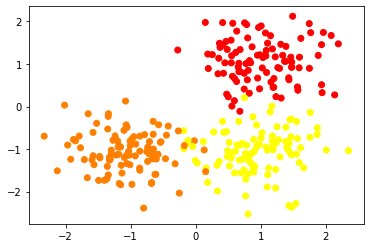

In [110]:
plt.scatter(X[:,0], X[:,1], c=labels, cmap="autumn")

In [111]:
# Afinidad
af = AffinityPropagation(preference=-50, random_state=0).fit(X)

In [112]:
# Los números que serán los tres centros
af.cluster_centers_indices_  # Obtendremos las posiciones de los puntos, por ejemplo, el punto en posición 160, ...

array([160, 250, 272])

In [113]:
# Vemos que se han generado 3 clusters sin yo decir nada
clusters_centers_ids = af.cluster_centers_indices_

In [114]:
# ¿Qué etiqueta tiene cada uno de ellos?
af.labels_[160], af.labels_[250], af.labels_[272]

(0, 1, 2)

In [115]:
# Vemos que difieren de las etiquetas originales
labels[160], labels[250], labels[272]

(0, 2, 1)

Hagamos un informe para ver lo que ha devuelto el algoritmo

In [138]:
def report_affinity_propagation(X):
    af = AffinityPropagation(preference=-50, random_state=0).fit(X)
    clusters_centers_ids = af.cluster_centers_indices_
    n_clust = len(clusters_centers_ids)
    clust_labels = af.labels_
    
    print("Número estimado de clusters: %d"%n_clust)
    print("Homogeneidad: %0.3f"%metrics.homogeneity_score(labels, clust_labels))
    print("Completitud: %0.3f"%metrics.completeness_score(labels, clust_labels))
    print("V-measure: %0.3f"%metrics.v_measure_score(labels, clust_labels))
    print("R2 ajustado: %0.3f"%metrics.adjusted_rand_score(labels, clust_labels))
    print("Informacion mutua ajustada: %0.3f"%metrics.adjusted_mutual_info_score(labels, clust_labels))
    print("Coeficiente de la silueta: %0.3f"%metrics.silhouette_score(X, labels, metric="sqeuclidean"))
    
    plt.figure(figsize=(16,9))
    plt.clf() # Para establecer el tipo de dibujo
    
    colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')  # Ciclo de colores
    for k, col in zip(range(n_clust), colors):
        class_members = (clust_labels==k)
        clust_center = X[clusters_centers_ids[k]]
        # Pintamos los miembros
        plt.plot(X[class_members, 0], X[class_members, 1], col + '.')
        # Pintamos el centro
        plt.plot(clust_center[0], clust_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=14)
        for x in X[class_members]:
            plt.plot([clust_center[0],x[0]], [clust_center[1], x[1]], col) # Para que pinte una flecha
        
    plt.title("Número estimado de clusters %d"%n_clust)
    plt.show()

Número estimado de clusters: 3
Homogeneidad: 0.872
Completitud: 0.872
V-measure: 0.872
R2 ajustado: 0.912
Informacion mutua ajustada: 0.871
Coeficiente de la silueta: 0.735


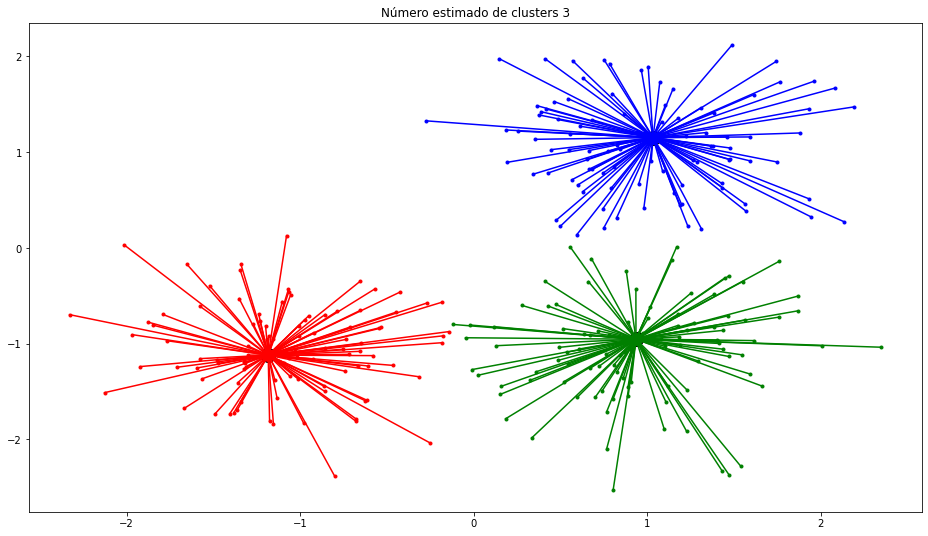

In [140]:
report_affinity_propagation(X)

# Explicación del algoritmo affinity propagation

https://towardsdatascience.com/unsupervised-machine-learning-affinity-propagation-algorithm-explained-d1fef85f22c8

https://towardsdatascience.com/math-and-intuition-behind-affinity-propagation-4ec5feae5b23

# Generando distribuciones en forma de anillo

Veamos una distribución que puede ser difícil de clasificar con k-means. Los clusters k-means suelen ser *redonditos*. Veamos otro tipo de distribuciones.

In [147]:
from math import sin, cos, radians, pi, sqrt
import numpy.random as rnd
import numpy as np

In [148]:
# Fabricaremos un anillo de puntos
def ring(r_min=0, r_max=1, n_samples=360):
    angle = rnd.uniform(0, 2*pi, n_samples)
    distance = rnd.uniform(r_min, r_max, n_samples)
    data = []
    for a, d in zip(angle, distance):
        # Usamos coordenadas polares
        data.append([d*cos(a), d*sin(a)])
    return np.array(data)

In [183]:
data1= ring(4, 8)
data2= ring(24, 28)

In [184]:
# Concatenamos los datos y generamos labels
data = np.concatenate([data1, data2], axis=0)
labels = np.concatenate([[0 for i in range(0, len(data1))], [1 for i in range(0, len(data2))]], axis=0)

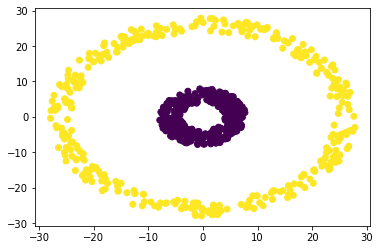

In [185]:
plt.scatter(data[:, 0], data[:, 1], c=labels)

## Hagamos el algoritmo con k-means

Deberemos ver que el resultado no es bueno.

In [186]:
from sklearn.cluster import KMeans

In [187]:
# Se que hay dos clusters
km = KMeans(2).fit(data)

In [188]:
# Estudiemos la predicción
clust = km.predict(data)

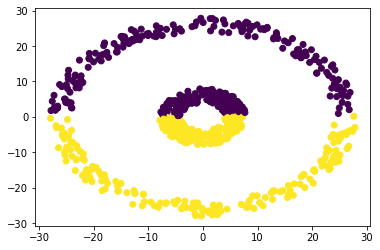

In [189]:
# Dibujemos los clusters
plt.scatter(data[:, 0], data[:, 1], c=clust)  # La diferencia es la coloración que estoy utilizando

Vemos claramente que algo falla y no va bien. El algoritmo no clasifica bien estas distribuciones basadas en anillos u otras formas distintas a los *redonderitos*.

# K-Medoides y el clustering espectral

La técnica de los k-medoides consiste en

* seleccionar k puntos iniciales dentro del conjunto inicial de clusters
* para cada uno de los puntos del dataset calcularemos el centro del cluster más cercano con cualquier tipo de métrica
* y la diferencia está en que el centro del cluster no quedará asignado al baricentro de esos puntos sino que quedará asignado a dicho punto en cuestión siempre que mejore el resultado

Se trata de buscar como centro del cluster aquél que está en medio.

Aquí aparece el concepto de **compacidad**.

In [190]:
from pyclust import KMedoids

In [191]:
clust = KMedoids(2).fit_predict(data)

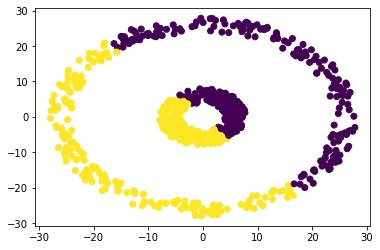

In [192]:
plt.scatter(data[:, 0], data[:, 1], c=clust)

Está claro que no hemos mejorado en nada. Podríamos hacer una transformación (lineal, parabólica, etc.) y mejorar el cluster.

Vamos a aplicar la técnica de los vecindarios.

# Algoritmo del Clustering Espectral

In [193]:
from sklearn.cluster import SpectralClustering

In [194]:
# Hace transformación de los datos originales
# Calcula valores y vectores propios
# Crea una matriz laplaciana
# ...
clust = SpectralClustering(2).fit_predict(data)

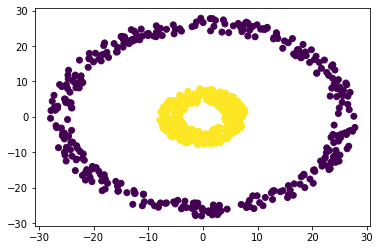

In [196]:
plt.scatter(data[:, 0], data[:, 1], c=clust)

# Resumen

Podemos estimar k:
* No: propagación de la afinidad
* Sí: Podemos usar la distancia euclídea
    * Si: K-means
    * No: buscar valores centrales
        * Sí: k-medoides
        * No: los datos son linealmente separables
            * Sí: clustering aglomerativo
            * No: clustering espectral

<img src="img/img_999(017).png" width=650/>